In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Folder dataset
train_dir = 'EmotionData/train'  # Path ke folder train
test_dir = 'EmotionData/test'    # Path ke folder test

# Preprocessing Data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Bangun Model CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 kelas emosi
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=200
)

# Simpan Model
model.save('emotion_models.h5')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 697s 768ms/step - accuracy: 0.2701 - loss: 1.7768 - val_accuracy: 0.4113 - val_loss: 1.5159
Epoch 2/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.4150 - loss: 1.4994 - val_accuracy: 0.4869 - val_loss: 1.3296
Epoch 3/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.4774 - loss: 1.3650 - val_accuracy: 0.5132 - val_loss: 1.2735
Epoch 4/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.4972 - loss: 1.3105 - val_accuracy: 0.5152 - val_loss: 1.2569
Epoch 5/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - accuracy: 0.5232 - loss: 1.2565 - val_accuracy: 0.5334 - val_loss: 1.2097
Epoch 6/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.5349 - loss: 1.2193 - val_accuracy: 0.5425 - val_loss: 1.1939
Epoch 7/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.5465 - loss: 1.1936 - val_accuracy: 0.5465 - val_loss: 1.1846
Epoch 8/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 72s 80ms/step - accuracy: 0.5545 - loss: 1.1717 - va

225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 221ms/step


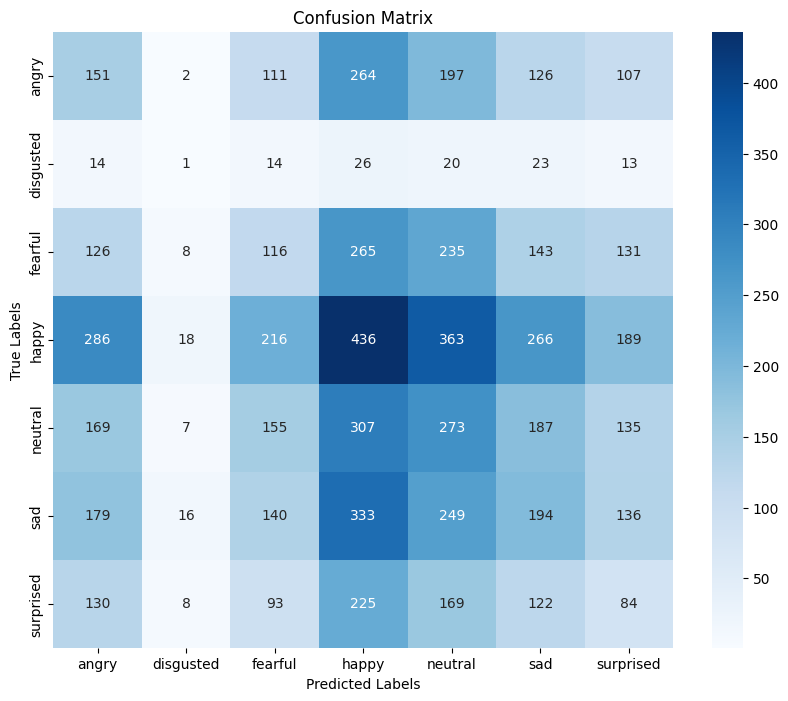

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Prediksi pada data validasi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Kelas label
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

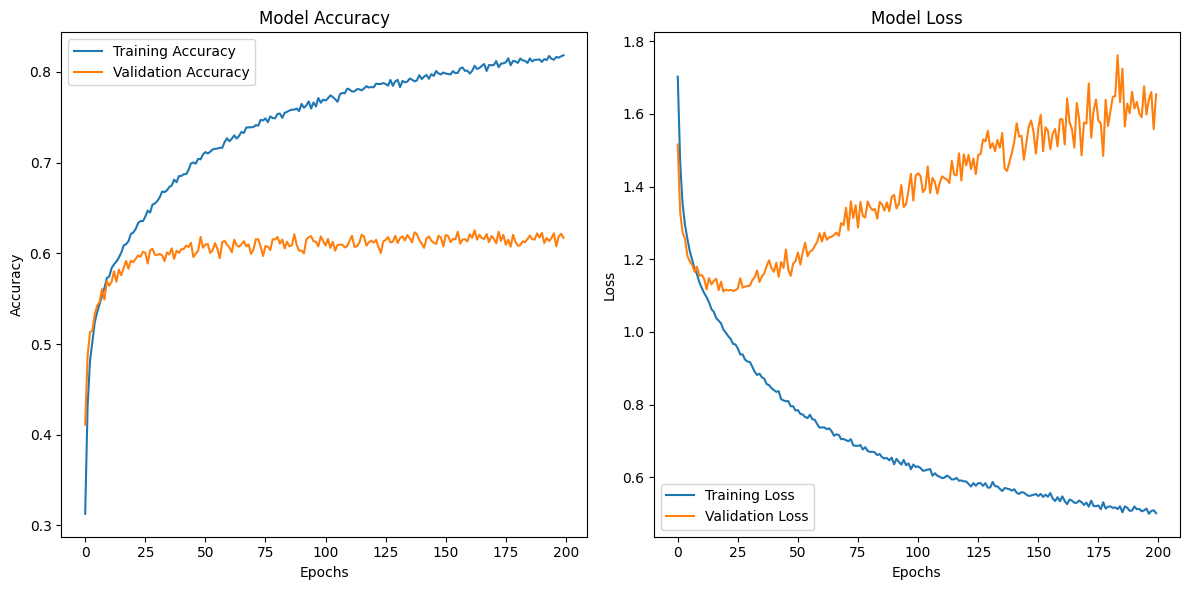

In [8]:
# Menampilkan hasil training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


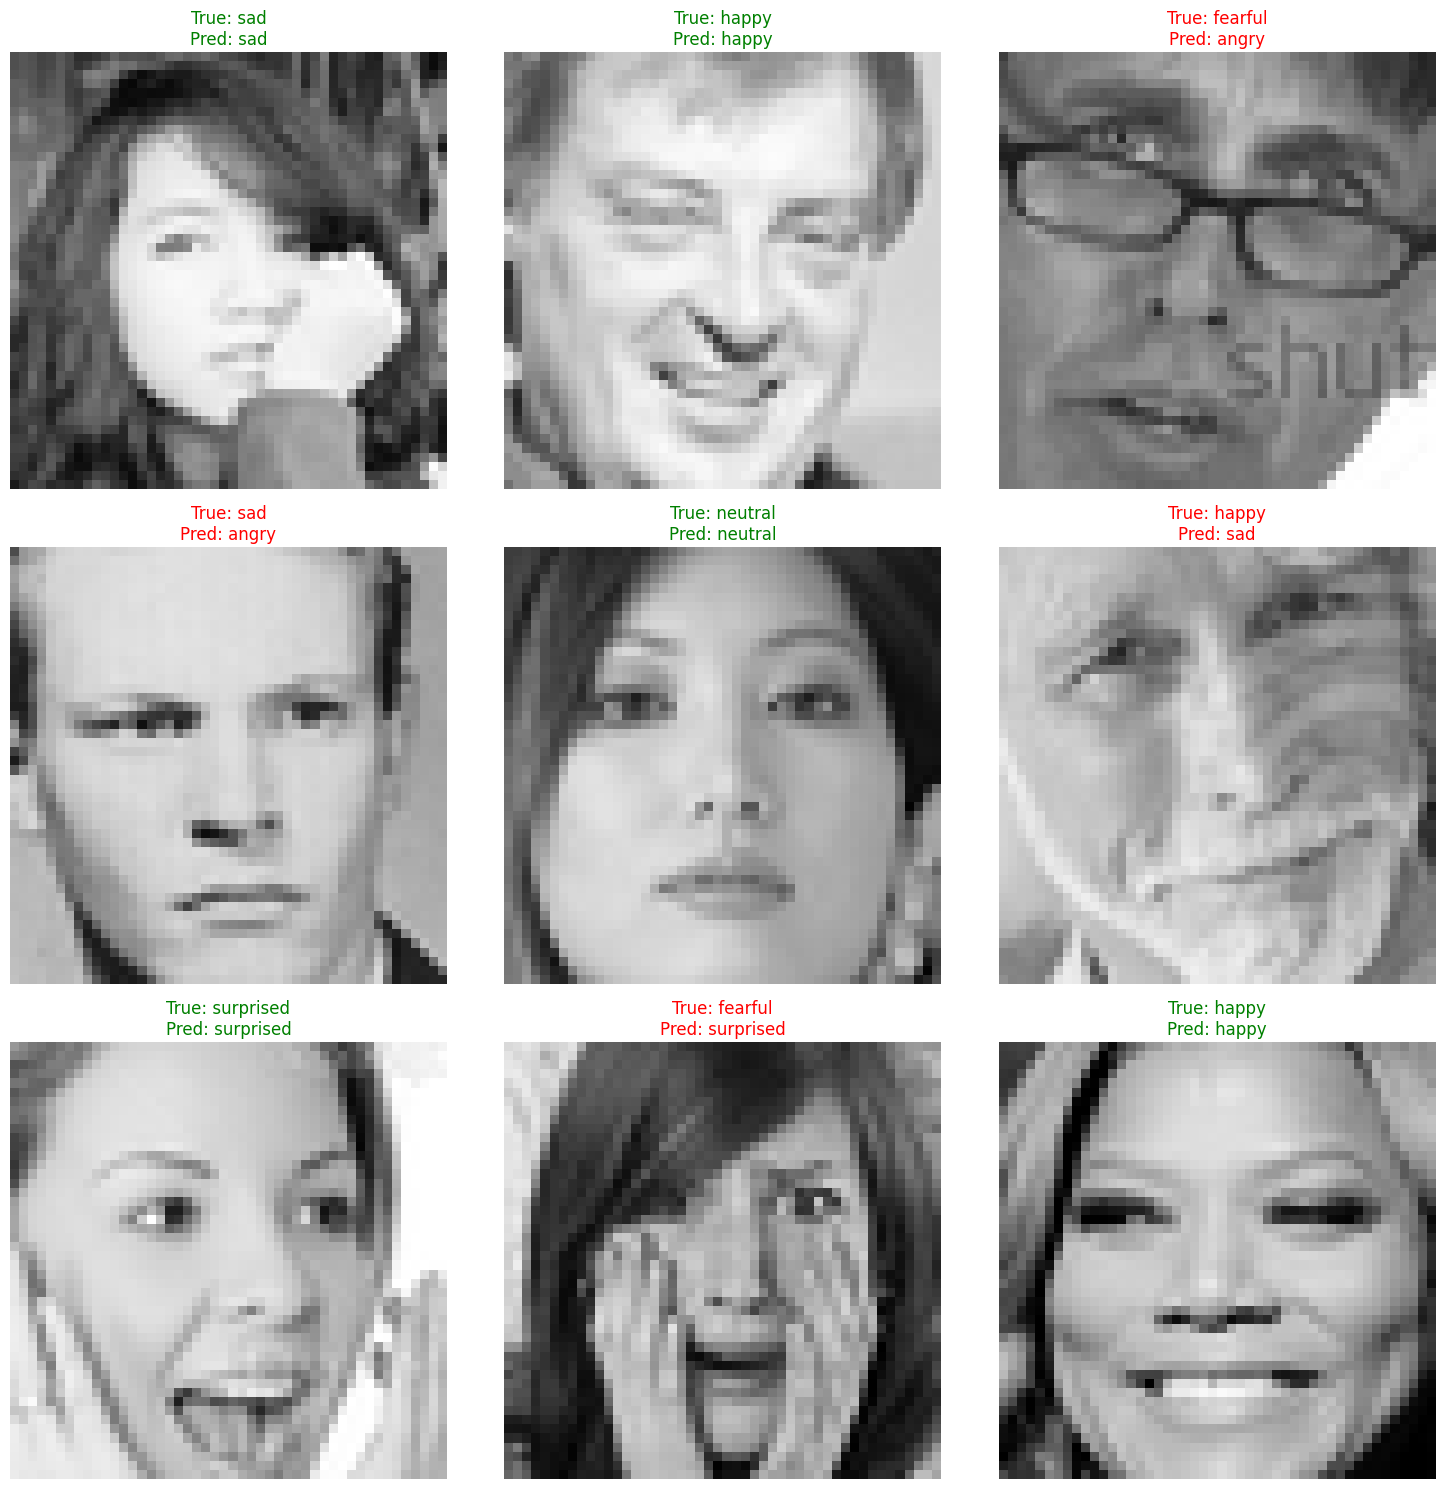

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil batch gambar dan label dari test generator
images, labels = next(test_generator)  # Ambil batch pertama dari data validasi
predictions = model.predict(images)  # Prediksi gambar

# Ambil label asli dan prediksi
true_labels = np.argmax(labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Plot beberapa gambar
plt.figure(figsize=(15, 15))
for i in range(9):  # Menampilkan 9 gambar pertama
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}",
              color="green" if true_labels[i] == predicted_labels[i] else "red")
plt.tight_layout()
plt.show()

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Muat dataset film (dengan dataset yang sudah dibersihkan)
movies = pd.read_csv('processed_movies.csv')  # Path dataset
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Pastikan genres berupa daftar

# Muat model CNN terlatih
model = load_model('emotion_model.keras')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Adventure']
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy', 'Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Mystery', 'Fantasy', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']

# Fungsi untuk memprediksi emosi dari wajah
def predict_emotion(face):
    face_resized = cv2.resize(face, (48, 48))
    face_resized = face_resized.astype('float32') / 255.0  # Normalisasi
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_GRAY2RGB)
    face_rgb = face_rgb.reshape(1, 48, 48, 3)
    prediction = model.predict(face_rgb)
    emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    detected_emotion = emotion_classes[np.argmax(prediction)]
    return detected_emotion

# Inisialisasi Cascade Classifier untuk deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Tangkap gambar dari kamera secara real-time
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

print("Tekan 'q' untuk keluar.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Tidak dapat membaca frame.")
        break

    # Ubah ke grayscale untuk deteksi wajah
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(48, 48))

    for (x, y, w, h) in faces:
        # Potong area wajah
        face = gray_frame[y:y + h, x:x + w]

        # Prediksi emosi
        detected_emotion = predict_emotion(face)

        # Rekomendasi film berdasarkan emosi
        recommended_genres = get_recommendations_by_emotion(detected_emotion)
        recommended_movies = movies[movies['genres'].apply(lambda genres: any(genre in genres for genre in recommended_genres))]

        # Tambahkan kotak dan label emosi pada frame
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, detected_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Tampilkan rekomendasi film di terminal
        print(f"Ekspresi wajah terdeteksi: {detected_emotion}")
        print("Rekomendasi film:")
        print(recommended_movies[['title', 'genres']].head(5))  # Tampilkan 5 rekomendasi teratas

    # Tampilkan frame
    cv2.imshow("Live Frame", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Membersihkan resource
cap.release()
cv2.destroyAllWindows()

ValueError: File not found: filepath=emotion_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
## ALTERNATIF CODE

In [68]:
import cv2
from deepface import DeepFace
import pandas as pd

# Muat dataset film (dengan dataset yang sudah dibersihkan)
movies = pd.read_csv('processed_movies.csv')  # path dataset 

# Pastikan kolom genres berisi string yang dapat diproses
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Jika genre dipisahkan koma, sesuaikan sesuai format dataset

# Muat model deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Drama']  # Genre yang cocok untuk emosi 'sedih'
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy', 'Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Horror', 'Mystery', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']  # Default jika tidak ada emosi terdeteksi

# Fungsi untuk mendapatkan rekomendasi film berdasarkan ekspresi wajah
def recommend_movies_based_on_expression(frame):
    # Konversi frame ke grayscale untuk deteksi wajah
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Deteksi wajah dalam gambar
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    # Jika ada wajah yang terdeteksi
    for (x, y, w, h) in faces:
        face_roi = frame[y:y + h, x:x + w]
        
        try:
            # Prediksi ekspresi wajah menggunakan DeepFace
            results = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)
            dominant_emotion = results[0]['dominant_emotion']  # Ambil emosi dominan
            confidence = results[0]['emotion'][dominant_emotion]  # Ambil confidence untuk emosi dominan
            
            # Tampilkan hasil analisis dengan akurasi
            print(f"Ekspresi wajah: {dominant_emotion} (Confidence: {confidence:.2f})")
            
            # Dapatkan daftar genre berdasarkan emosi
            recommended_genres = get_recommendations_by_emotion(dominant_emotion.lower())
            print(f"Genre yang disarankan berdasarkan ekspresi: {recommended_genres}")
            
            # Filter film berdasarkan genre yang relevan
            recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]
            
            # Tampilkan hasil rekomendasi film
            print(f"Rekomendasi film:\n{recommended_movies[['title', 'genres']]}")
        
        except Exception as e:
            print(f"Kesalahan analisis wajah: {e}")

# Inisialisasi kamera dan ambil satu frame
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

# Ambil satu frame dari kamera
ret, frame = cap.read()
if not ret:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

# Melepaskan kamera setelah mengambil satu frame
cap.release()

# Lakukan rekomendasi film berdasarkan ekspresi wajah
recommend_movies_based_on_expression(frame)


Ekspresi wajah: surprise (Confidence: 99.38)
Genre yang disarankan berdasarkan ekspresi: ['Horror', 'Mystery', 'Thriller']
Rekomendasi film:
                                  title      genres
603                           Hard Rain  [Thriller]
936                    Don't Say a Word  [Thriller]
943                            Firewall  [Thriller]
1011                    The Tooth Fairy    [Horror]
1160                    The Conjuring 2    [Horror]
...                                 ...         ...
4659                     American Beast    [Horror]
4705                      Straightheads  [Thriller]
4738                     Raymond Did It    [Horror]
4744  Her Cry: La Llorona Investigation    [Horror]
4764                        Tin Can Man    [Horror]

[87 rows x 2 columns]


In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Muat dataset film
movies = pd.read_csv('processed_movies.csv')  # Path ke dataset film
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Konversi string list ke list Python

# Muat model CNN
model = load_model('emotion_detection_model.h5')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Adventure']
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy', 'Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Mystery', 'Fantasy', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']

# Fungsi untuk merekomendasikan film berdasarkan ekspresi wajah
def predict_emotion_and_recommend(frame):
    if frame is None or frame.size == 0:
        print("Frame kosong, tidak dapat diproses.")
        return None

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_resized = cv2.resize(gray_frame, (48, 48)).astype('float32') / 255.0
    face_input = np.expand_dims(np.expand_dims(face_resized, -1), 0)
    prediction = model.predict(face_input)
    emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    detected_emotion = emotion_classes[np.argmax(prediction)]

    print(f"Ekspresi wajah terdeteksi: {detected_emotion}")
    recommended_genres = get_recommendations_by_emotion(detected_emotion)
    recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]

    print("\nRekomendasi film berdasarkan ekspresi:")
    print(recommended_movies[['title', 'genres']])
    return recommended_movies[['title', 'genres']]

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

ret, frame = cap.read()
if not ret or frame is None:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

cap.release()
recommended_movies = predict_emotion_and_recommend(frame)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Ekspresi wajah terdeteksi: surprise

Rekomendasi film berdasarkan ekspresi:
                                title      genres
105   Alice Through the Looking Glass   [Fantasy]
161                     Gods of Egypt   [Fantasy]
584                              Wolf   [Fantasy]
603                         Hard Rain  [Thriller]
803                       DragonHeart   [Fantasy]
936                  Don't Say a Word  [Thriller]
943                          Firewall  [Thriller]
1346                   Reindeer Games  [Thriller]
1634           Assault on Precinct 13  [Thriller]
1770                    Money Monster  [Thriller]
2035              Our Kind of Traitor  [Thriller]
2274                         Survivor  [Thriller]
2366                     Dragonslayer   [Fantasy]
2391                       Red Lights  [Thriller]
2401                   City of Ghosts  [Thriller]
2588                A Most Wanted Man  [Thriller]
2622                     The In Crow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


# Folder dataset
train_dir = 'EmotionData/train'  # Path ke folder train
test_dir = 'EmotionData/test'    # Path ke folder test

# Preprocessing Data dengan augmentasi yang lebih banyak
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,       # Rotasi lebih besar
    width_shift_range=0.2,   # Perubahan posisi horizontal
    height_shift_range=0.2,  # Perubahan posisi vertikal
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom in/out
    horizontal_flip=True,    # Pembalikan horizontal
    fill_mode='nearest'      # Pengisian setelah transformasi
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Membaca dataset dan mempersiapkan data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)


# Bangun Model CNN yang lebih dalam dan ditambahkan BatchNormalization
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(7, activation='softmax')  # 7 kelas emosi
])

# Compile Model dengan optimasi learning rate yang lebih baik
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# EarlyStopping untuk menghentikan pelatihan jika val_loss tidak membaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ReduceLROnPlateau untuk menurunkan learning rate jika val_loss tidak membaik
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)


# Melatih model dengan dataset dan callback yang telah disiapkan
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=200,
    callbacks=[early_stopping, reduce_lr]
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/200


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 83ms/step - accuracy: 0.2124 - loss: 2.3377 - val_accuracy: 0.3065 - val_loss: 1.7234 - learning_rate: 1.0000e-04
Epoch 2/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - accuracy: 0.2608 - loss: 1.7933 - val_accuracy: 0.3473 - val_loss: 1.6641 - learning_rate: 1.0000e-04
Epoch 3/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.2911 - loss: 1.7455 - val_accuracy: 0.3729 - val_loss: 1.6026 - learning_rate: 1.0000e-04
Epoch 4/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - accuracy: 0.3077 - loss: 1.7134 - val_accuracy: 0.4196 - val_loss: 1.5310 - learning_rate: 1.0000e-04
Epoch 5/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - accuracy: 0.3307 - loss: 1.6721 - val_accuracy: 0.4361 - val_loss: 1.4711 - learning_rate: 1.0000e-04
Epoch 6/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.3541 - loss: 1.6327 - val_accuracy: 0.4487 - val_loss: 1.4352 - learning_rate: 1.0000e-04
Epoch 7/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - a

In [5]:
model.save('emotionm_model.keras')

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


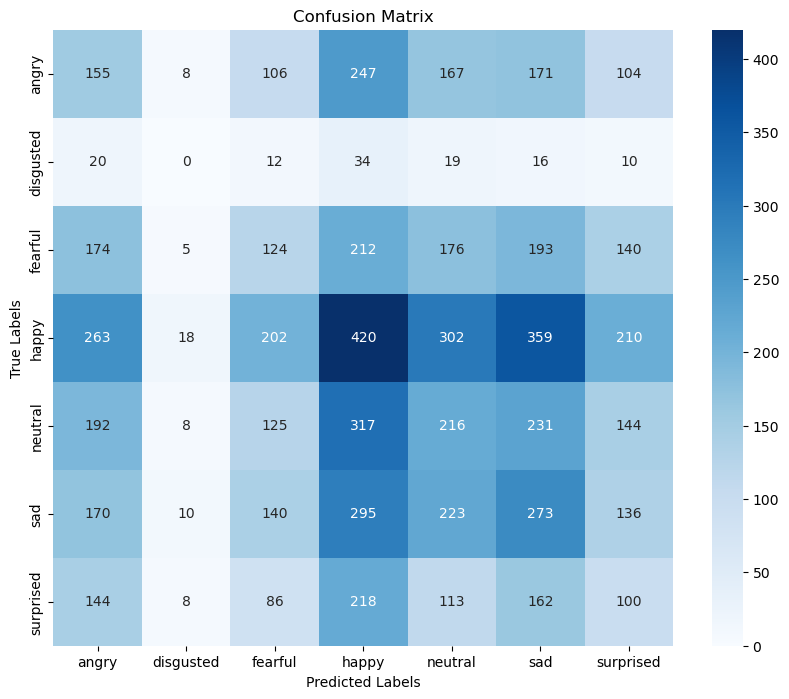

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Prediksi pada data validasi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Kelas label
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

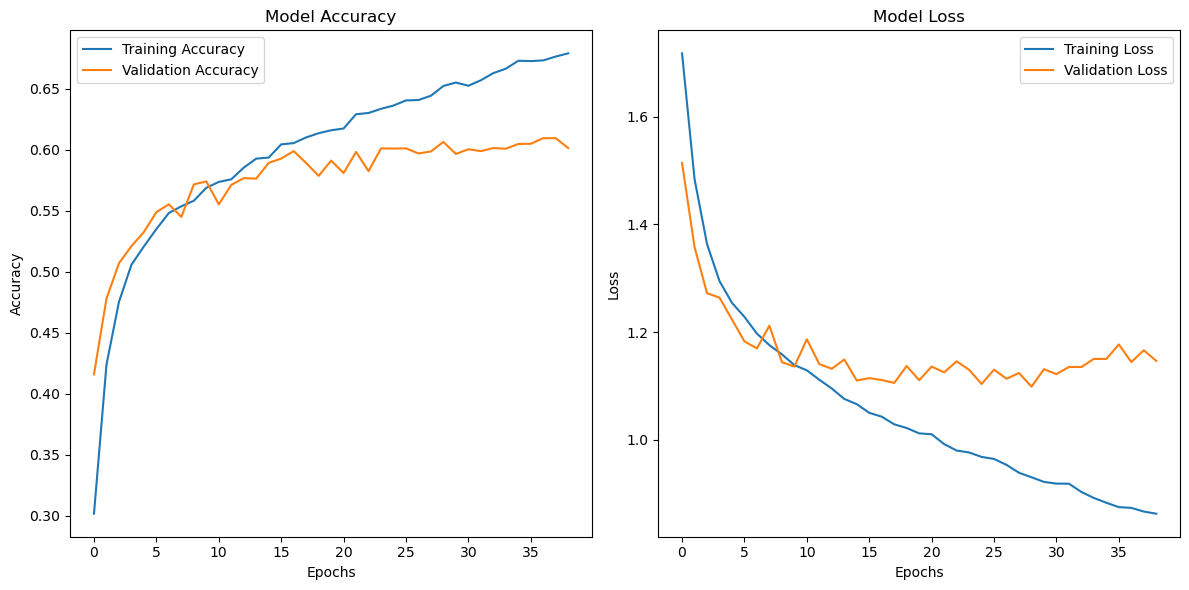

In [7]:
# Menampilkan hasil training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


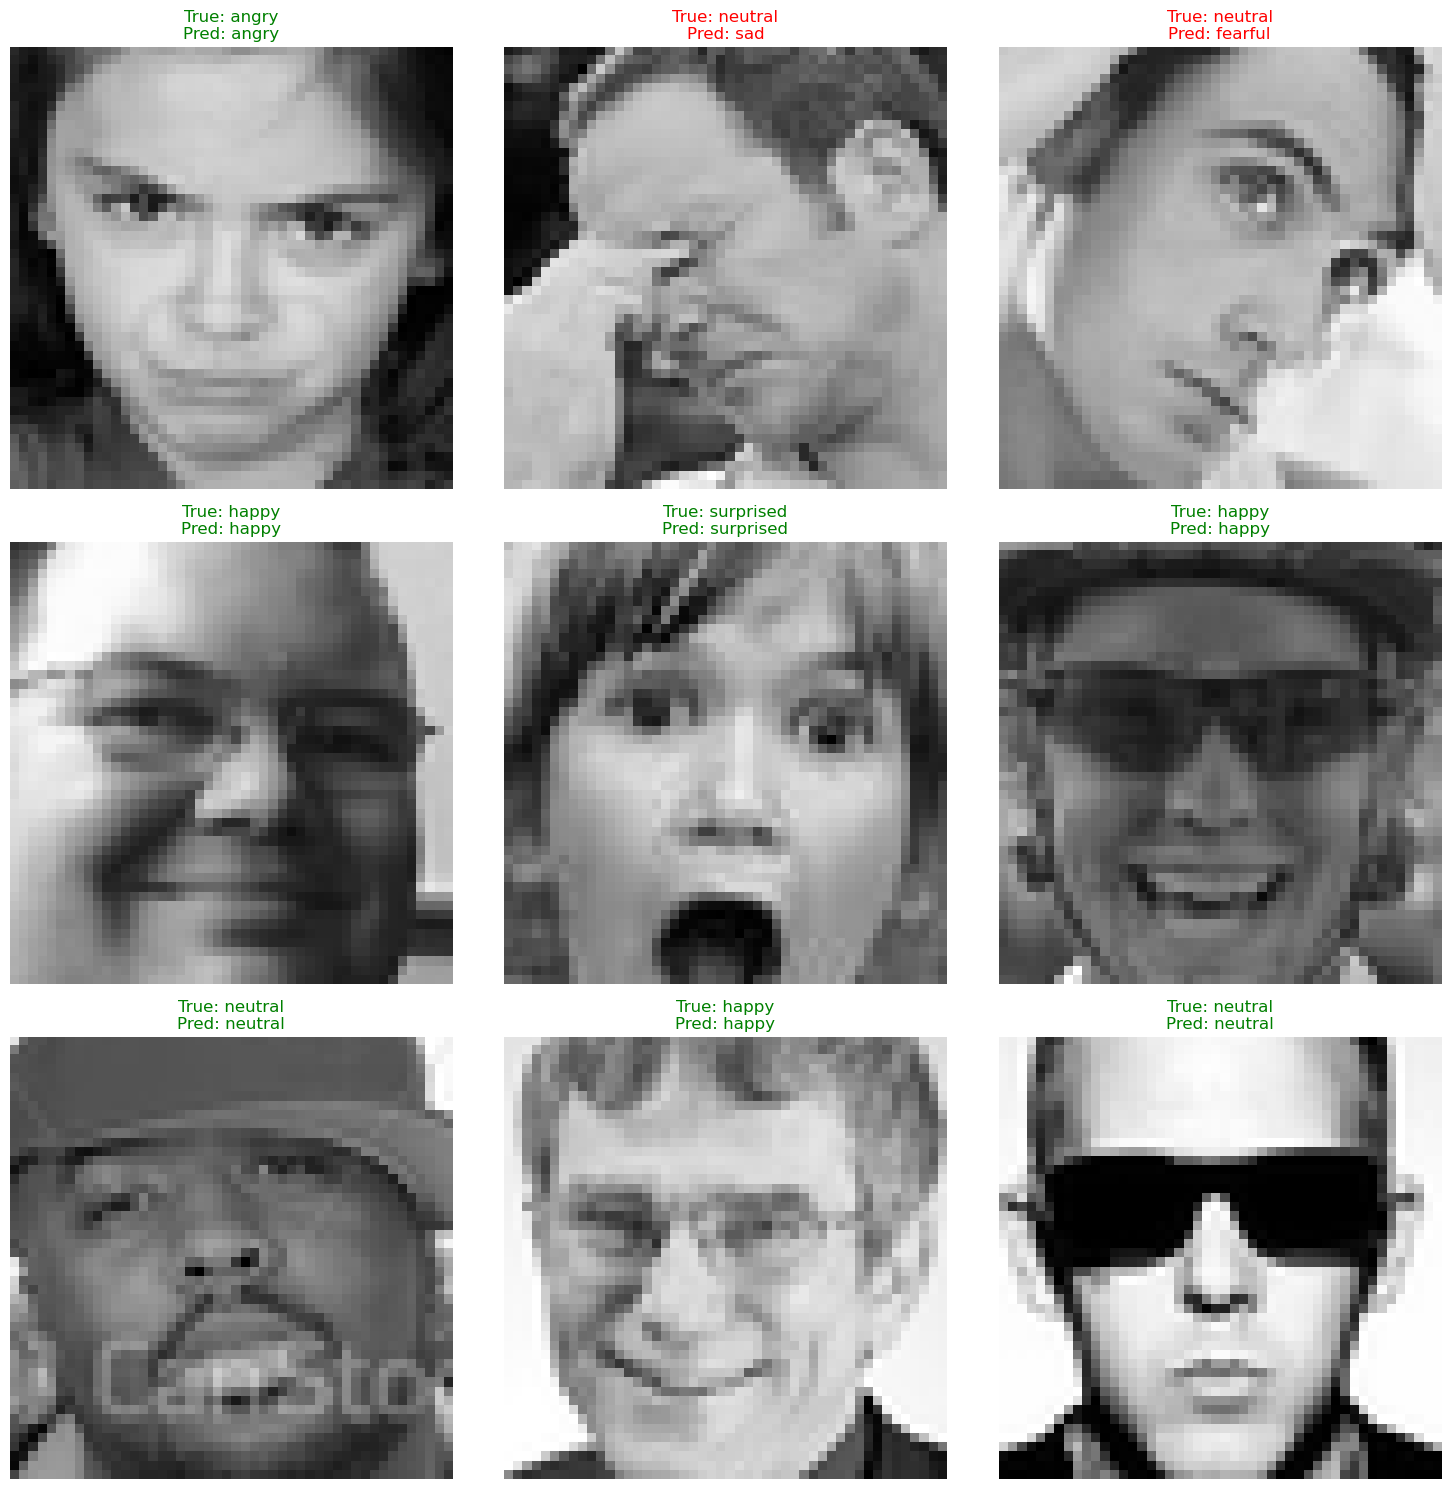

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil batch gambar dan label dari test generator
images, labels = next(test_generator)  # Ambil batch pertama dari data validasi
predictions = model.predict(images)  # Prediksi gambar

# Ambil label asli dan prediksi
true_labels = np.argmax(labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Plot beberapa gambar
plt.figure(figsize=(15, 15))
for i in range(9):  # Menampilkan 9 gambar pertama
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}",
              color="green" if true_labels[i] == predicted_labels[i] else "red")
plt.tight_layout()
plt.show()

In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Muat dataset film
movies = pd.read_csv('processed_movies.csv')  # Path ke dataset film
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Konversi string list ke list Python

# Muat model CNN
model = load_model('emotionm_model.keras')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Adventure']
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy', 'Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Mystery', 'Fantasy', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']

# Fungsi untuk merekomendasikan film berdasarkan ekspresi wajah
def predict_emotion_and_recommend(frame):
    if frame is None or frame.size == 0:
        print("Frame kosong, tidak dapat diproses.")
        return None

       # Mengubah gambar menjadi grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize gambar ke ukuran input model
    face_resized = cv2.resize(gray_frame, (48, 48)).astype('float32') / 255.0
    
    # Ubah grayscale menjadi RGB (tambah dimensi channel)
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_GRAY2RGB)
    
    # Ubah bentuk array sehingga menjadi (1, 48, 48, 3)
    face_input = np.expand_dims(face_rgb, axis=0)
    
    # Prediksi emosi
    prediction = model.predict(face_input)
    emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    detected_emotion = emotion_classes[np.argmax(prediction)]

    print(f"Ekspresi wajah terdeteksi: {detected_emotion}")
    recommended_genres = get_recommendations_by_emotion(detected_emotion)
    recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]

    print("\nRekomendasi film berdasarkan ekspresi:")
    print(recommended_movies[['title', 'genres']])
    return recommended_movies[['title', 'genres']]

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

ret, frame = cap.read()
if not ret or frame is None:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

cap.release()
recommended_movies = predict_emotion_and_recommend(frame)

C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Ekspresi wajah terdeteksi: fear

Rekomendasi film berdasarkan ekspresi:
                       title    genres
44                 Furious 7  [Action]
155   Fun with Dick and Jane  [Comedy]
162                  Stealth  [Action]
251       Gulliver's Travels  [Comedy]
321             The Campaign  [Comedy]
...                      ...       ...
4698       Hollywood Shuffle  [Comedy]
4716                  The FP  [Comedy]
4734            A True Story  [Comedy]
4746                  Clerks  [Comedy]
4752                 Slacker  [Comedy]

[303 rows x 2 columns]
